In [195]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_colwidth', None)

In [59]:
#to connect to the website, pass the URL string into requests.get
page = requests.get('https://www.the-numbers.com/market/')

In [60]:
#we can look at the source code with .text
#page.text

In [61]:
#pull in website's source code
url = 'https://www.the-numbers.com/market/'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

I want the column names to be the same column names used in the table on the website, so I need to scrape the text from the table header.
After inspecting the website's source code, I find that the start tag for the table header is 'tr'. I only want to scrape the single row, so I will use .find() method.

### Table 1: Annual Ticket Sales

In [62]:
#identify header row
header = soup.find('tr')
print(header)

#extract the text column names from the header row
columns = []
for col in header.find_all('th'):
    columns.append(col.get_text())

print(columns)

<tr><th>Year</th><th>Tickets Sold<th>Total Box Office</th><th>Total Inflation<br/>Adjusted Box Office</th><th>Average<br/>Ticket Price</th></th></tr>
['Year', 'Tickets SoldTotal Box OfficeTotal InflationAdjusted Box OfficeAverageTicket Price', 'Total Box Office', 'Total InflationAdjusted Box Office', 'AverageTicket Price']


In [24]:
#create DataFrame using the first table (annual ticket sales) on the site page

##after scraping table 1's header, I see that the titles are not correctly formatted, so I created new column names in the list columns.
columns = ['Year', 'Tickets Sold', 'Total Box Office', 'Total Inflation Adjusted Box Office', 'Average Ticket Price']

##select all scripts for table 1 (index is 0), and extract each row's code with find_all('tr')
table_1 = soup.select('table')[0]
rows = table_1.find_all('tr')

##create an empty list output
output = []

##using a for loop, each row's information is put into individual lists using list comprehensions
##and then append each list into output
for row in rows[1:]:
    infos = [info.get_text() for info in row.find_all('td', attrs = {'class':'data'})]
    output.append(infos)
    
##create final dataframe
final_sales = pd.DataFrame(output, columns=columns)
final_sales

,Year,Tickets Sold,Total Box Office,Total Inflation Adjusted Box Office,Average Ticket Price
0,2021,"498,668,345","$4,567,803,933","$4,567,803,935",$9.16
1,2020,"223,239,573","$2,044,876,261","$2,044,876,261",$9.16
2,2019,"1,228,763,381","$11,255,475,182","$11,255,475,286",$9.16
3,2018,"1,311,300,934","$11,945,954,034","$12,011,516,576",$9.11
4,2017,"1,225,639,761","$10,993,991,460","$11,226,860,216",$8.97
5,2016,"1,302,556,379","$11,267,115,924","$11,931,416,433",$8.65
6,2015,"1,323,267,005","$11,155,143,861","$12,121,125,772",$8.43
7,2014,"1,257,402,920","$10,272,985,008","$11,517,810,744",$8.17
8,2013,"1,339,168,926","$10,887,446,341","$12,266,787,382",$8.13
9,2012,"1,380,921,942","$10,992,141,616","$12,649,244,986",$7.96


In [25]:
#check data types
final_sales.dtypes

Year                                   object
Tickets Sold                           object
Total Box Office                       object
Total Inflation Adjusted Box Office    object
Average Ticket Price                   object
dtype: object

In [26]:
#convert all columns into integer or float
##convert Year column into integer
final_sales['Year'] = final_sales['Year'].astype('int')

##convert tickets sold into integer: first use .str.replace() to delete comma
final_sales['Tickets Sold'] = final_sales['Tickets Sold'].str.replace(',', '')
final_sales['Tickets Sold'] = final_sales['Tickets Sold'].astype('int')

##convert total box office
final_sales['Total Box Office'] = final_sales['Total Box Office'].str.replace('[\$,]', '', regex=True)
final_sales['Total Box Office'] = final_sales['Total Box Office'].str.replace(',', '')
final_sales['Total Box Office'] = final_sales['Total Box Office'].astype('int')

##convert Total Inflation Adjusted Box Office
final_sales['Total Inflation Adjusted Box Office'] = final_sales['Total Inflation Adjusted Box Office'].str.replace('[\$,]', '', regex=True)
final_sales['Total Inflation Adjusted Box Office'] = final_sales['Total Inflation Adjusted Box Office'].str.replace(',', '')
final_sales['Total Inflation Adjusted Box Office'] = final_sales['Total Inflation Adjusted Box Office'].astype('int')

##convert Average Ticket Price
final_sales['Average Ticket Price'] = final_sales['Average Ticket Price'].str.replace('[\$,]', '', regex=True)
final_sales['Average Ticket Price'] = final_sales['Average Ticket Price'].astype('float')

final_sales

,Year,Tickets Sold,Total Box Office,Total Inflation Adjusted Box Office,Average Ticket Price
0,2021,498668345,4567803933,4567803935,9.16
1,2020,223239573,2044876261,2044876261,9.16
2,2019,1228763381,11255475182,11255475286,9.16
3,2018,1311300934,11945954034,12011516576,9.11
4,2017,1225639761,10993991460,11226860216,8.97
5,2016,1302556379,11267115924,11931416433,8.65
6,2015,1323267005,11155143861,12121125772,8.43
7,2014,1257402920,10272985008,11517810744,8.17
8,2013,1339168926,10887446341,12266787382,8.13
9,2012,1380921942,10992141616,12649244986,7.96


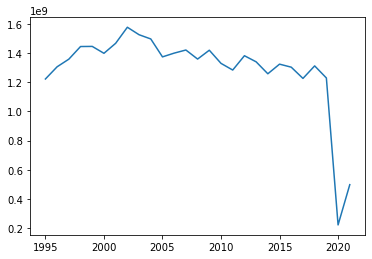

In [34]:
#from this plot, we can see that ticket sales droped significantly in 2020.
plt.plot(final_sales['Year'], final_sales['Tickets Sold'])
plt.show()

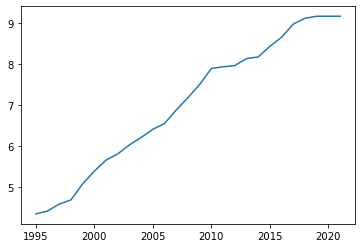

In [35]:
#from this plot, we see that average ticket price increases from 1995 to 2018, and stablizes from 2018.
plt.plot(final_sales['Year'], final_sales['Average Ticket Price'])
plt.show()

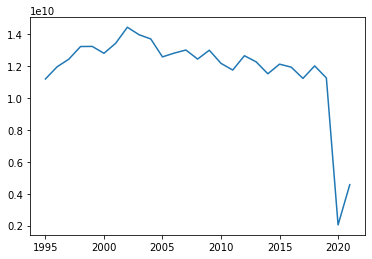

In [38]:
#from this plot, we can see inflation dropped dramatically in 2020.
plt.plot(final_sales['Year'], final_sales['Total Inflation Adjusted Box Office'])
plt.show()

### Table 2: Number of Wide Releases Each Year

In [49]:
#extract column names for the second table (index is 1)
table_2 = soup.select('table')[1]
table_2_rows = table_2.find_all('tr')

column_titles_2 = []

for header in table_2.find_all('th'):
    column_titles_2.append(header.get_text())

In [50]:
output_2 = []
for row in table_2_rows[1:]:
    infos = [info.get_text() for info in row.find_all('td', attrs = {'class': 'data'})]
    output_2.append(infos)

wide_releases = pd.DataFrame(output_2, columns = column_titles_2)
wide_releases

,Year,Warner Bros,Walt Disney,20th Century Fox,Paramount Pictures,Sony Pictures,Universal,Total Major 6,Total Other Studios
0,2022,10,7,0,10,11,24,62,30
1,2021,17,7,0,4,16,16,60,35
2,2020,5,3,1,3,9,13,34,23
3,2019,18,10,11,9,18,21,87,44
4,2018,19,10,11,10,16,20,86,58
5,2017,18,8,14,10,16,15,81,50
6,2016,17,12,16,12,16,22,95,46
7,2015,22,11,18,9,13,20,93,33
8,2014,17,12,17,10,17,15,88,37
9,2013,17,8,15,8,14,16,78,42


In [63]:
wide_releases.dtypes

Year                   object
Warner Bros            object
Walt Disney            object
20th Century Fox       object
Paramount Pictures     object
Sony Pictures          object
Universal              object
Total Major 6          object
Total Other Studios    object
dtype: object

In [64]:
#convert all columns types into integer
wide_releases = wide_releases.astype('int')
wide_releases

,Year,Warner Bros,Walt Disney,20th Century Fox,Paramount Pictures,Sony Pictures,Universal,Total Major 6,Total Other Studios
0,2022,10,7,0,10,11,24,62,30
1,2021,17,7,0,4,16,16,60,35
2,2020,5,3,1,3,9,13,34,23
3,2019,18,10,11,9,18,21,87,44
4,2018,19,10,11,10,16,20,86,58
5,2017,18,8,14,10,16,15,81,50
6,2016,17,12,16,12,16,22,95,46
7,2015,22,11,18,9,13,20,93,33
8,2014,17,12,17,10,17,15,88,37
9,2013,17,8,15,8,14,16,78,42


In [65]:
wide_releases.dtypes

Year                   int64
Warner Bros            int64
Walt Disney            int64
20th Century Fox       int64
Paramount Pictures     int64
Sony Pictures          int64
Universal              int64
Total Major 6          int64
Total Other Studios    int64
dtype: object

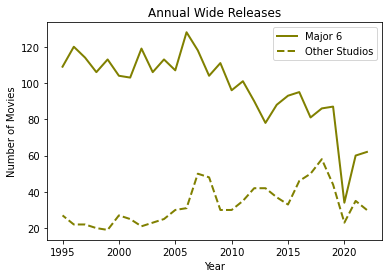

In [69]:
#plot a line graph to see differences in wide releases between major 6 and other studios
plt.plot('Year', 'Total Major 6', data=wide_releases, marker='', color='olive', linewidth=2, label='Major 6')
plt.plot('Year', 'Total Other Studios', data=wide_releases, marker='', color='olive', linestyle='dashed', linewidth=2, label='Other Studios')
plt.title('Annual Wide Releases')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.legend()
plt.show()

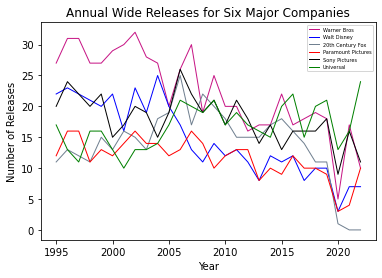

In [83]:
#plot a line graph to see differences in wide releases among 6 major production companies
plt.plot('Year', 'Warner Bros', data=wide_releases, marker='', color='mediumvioletred', linewidth=1, label='Warner Bros')
plt.plot('Year', 'Walt Disney', data=wide_releases, marker='', color='blue', linewidth=1, label='Walt Disney')
plt.plot('Year', '20th Century Fox', data=wide_releases, marker='', color='slategray', linewidth=1, label='20th Century Fox')
plt.plot('Year', 'Paramount Pictures', data=wide_releases, marker='', color='red', linewidth=1, label='Paramount Pictures')
plt.plot('Year', 'Sony Pictures', data=wide_releases, marker='', color='black', linewidth=1, label='Sony Pictures')
plt.plot('Year', 'Universal', data=wide_releases, marker='', color='green', linewidth=1, label='Universal')

plt.title('Annual Wide Releases for Six Major Companies')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend(prop={"size":5})
plt.show()

After creating dataframes for 2 tables, I found that the steps are identical for all tables, thus I created a function to simplify the dataframe creation process.

In [55]:
def table_dataframe(num):
    table = soup.select('table')[num]
    rows = table.find_all('tr')
    
    column_titles = []
    
    for header in table.find_all('th'):
        column_titles.append(header.get_text())
        
    input_data = []
    
    for row in rows[1:]:
        infos = [info.get_text() for info in row.find_all('td')]
        input_data.append(infos)
        
    df = pd.DataFrame(input_data, columns = column_titles)
    return df

### Table 3: Top Movie of Each Year

In [213]:
top_movie = table_dataframe(2)

top_movie

,Year,Movie,CategorizationCreative TypeProduction MethodSourceGenre,MPAARating,Distributor,Total for Year,Total in 2019 dollars,Tickets Sold
0,1995,Batman Forever,Super Hero\nLive Action\nBased on Comic/Graphic Novel\nAction,PG-13,Warner Bros.,"$184,031,112","$387,522,978","42,306,002"
1,1996,Independence Day,Science Fiction\nLive Action\nOriginal Screenplay\nAdventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","69,269,062"
2,1997,Men in Black,Science Fiction\nLive Action\nBased on Comic/Graphic Novel\nAdventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","54,607,854"
3,1998,Titanic,Historical Fiction\nLive Action\nOriginal Screenplay\nDrama,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","94,524,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Science Fiction\nAnimation/Live Action\nOriginal Screenplay\nAdventure,PG,20th Century Fox,"$430,443,350","$776,153,749","84,732,942"
5,2000,How the Grinch Stole Christmas,Kids Fiction\nLive Action\nBased on Fiction Book/Short Story\nAdventure,PG,Universal,"$253,367,455","$430,583,644","47,006,948"
6,2001,Harry Potter and the Sorcererâs Stone,Fantasy\nAnimation/Live Action\nBased on Fiction Book/Short Story\nAdventure,PG,Warner Bros.,"$300,404,434","$486,166,890","53,074,988"
7,2002,Spider-Man,Super Hero\nLive Action\nBased on Comic/Graphic Novel\nAdventure,PG-13,Sony Pictures,"$403,706,375","$636,480,273","69,484,746"
8,2003,Finding Nemo,Kids Fiction\nDigital Animation\nOriginal Screenplay\nAdventure,G,Walt Disney,"$339,714,367","$516,050,346","56,337,374"
9,2004,Shrek 2,Kids Fiction\nDigital Animation\nBased on Fiction Book/Short Story\nAdventure,PG,Dreamworks SKG,"$441,226,247","$650,826,473","71,050,925"


In [214]:
top_movie.columns

Index(['Year', 'Movie',
       'CategorizationCreative TypeProduction MethodSourceGenre', 'MPAARating',
       'Distributor', 'Total for Year', 'Total in 2019 dollars',
       'Tickets Sold'],
      dtype='object')

In [215]:
#after observing the dataset, I find that the Categorization column contains four variables (Creative Type, Production Method, Source, Genre)
#I want to separate them into four different columns

##first, replace \n with a comma
top_movie['CategorizationCreative TypeProduction MethodSourceGenre'] = top_movie['CategorizationCreative TypeProduction MethodSourceGenre'].str.replace(r'\n', ',', regex=True)

##second, split each variable in each row and put the splitted version in a new column 'category_split'
top_movie['category_split'] = top_movie['CategorizationCreative TypeProduction MethodSourceGenre'].str.split(',')

top_movie['category_split']

0                     [Super Hero, Live Action, Based on Comic/Graphic Novel, Action]
1                      [Science Fiction, Live Action, Original Screenplay, Adventure]
2             [Science Fiction, Live Action, Based on Comic/Graphic Novel, Adventure]
3                       [Historical Fiction, Live Action, Original Screenplay, Drama]
4            [Science Fiction, Animation/Live Action, Original Screenplay, Adventure]
5           [Kids Fiction, Live Action, Based on Fiction Book/Short Story, Adventure]
6      [Fantasy, Animation/Live Action, Based on Fiction Book/Short Story, Adventure]
7                  [Super Hero, Live Action, Based on Comic/Graphic Novel, Adventure]
8                   [Kids Fiction, Digital Animation, Original Screenplay, Adventure]
9     [Kids Fiction, Digital Animation, Based on Fiction Book/Short Story, Adventure]
10           [Science Fiction, Animation/Live Action, Original Screenplay, Adventure]
11             [Historical Fiction, Live Action, Based

In [216]:
##by looking at the splitted version, I see that index 0 indicates creative type, index 1 production method, index 2 source, index 3 genre
##create new columns to put variables accordingly using str.get(index)
top_movie['Creative Type'] = top_movie['category_split'].str.get(0)
top_movie['Production Method'] = top_movie['category_split'].str.get(1)
top_movie['Source'] = top_movie['category_split'].str.get(2)
top_movie['Genre'] = top_movie['category_split'].str.get(3)

##drop columns 'CategorizationCreative TypeProduction MethodSourceGenre' and 'category_split'
top_movie.drop(['CategorizationCreative TypeProduction MethodSourceGenre', 'category_split'], axis=1, inplace=True)
top_movie
            

,Year,Movie,MPAARating,Distributor,Total for Year,Total in 2019 dollars,Tickets Sold,Creative Type,Production Method,Source,Genre
0,1995,Batman Forever,PG-13,Warner Bros.,"$184,031,112","$387,522,978","42,306,002",Super Hero,Live Action,Based on Comic/Graphic Novel,Action
1,1996,Independence Day,PG-13,20th Century Fox,"$306,169,255","$634,504,608","69,269,062",Science Fiction,Live Action,Original Screenplay,Adventure
2,1997,Men in Black,PG-13,Sony Pictures,"$250,650,052","$500,207,943","54,607,854",Science Fiction,Live Action,Based on Comic/Graphic Novel,Adventure
3,1998,Titanic,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","94,524,324",Historical Fiction,Live Action,Original Screenplay,Drama
4,1999,Star Wars Ep. I: The Phantom Menace,PG,20th Century Fox,"$430,443,350","$776,153,749","84,732,942",Science Fiction,Animation/Live Action,Original Screenplay,Adventure
5,2000,How the Grinch Stole Christmas,PG,Universal,"$253,367,455","$430,583,644","47,006,948",Kids Fiction,Live Action,Based on Fiction Book/Short Story,Adventure
6,2001,Harry Potter and the Sorcererâs Stone,PG,Warner Bros.,"$300,404,434","$486,166,890","53,074,988",Fantasy,Animation/Live Action,Based on Fiction Book/Short Story,Adventure
7,2002,Spider-Man,PG-13,Sony Pictures,"$403,706,375","$636,480,273","69,484,746",Super Hero,Live Action,Based on Comic/Graphic Novel,Adventure
8,2003,Finding Nemo,G,Walt Disney,"$339,714,367","$516,050,346","56,337,374",Kids Fiction,Digital Animation,Original Screenplay,Adventure
9,2004,Shrek 2,PG,Dreamworks SKG,"$441,226,247","$650,826,473","71,050,925",Kids Fiction,Digital Animation,Based on Fiction Book/Short Story,Adventure


In [217]:
top_movie.dtypes

Year                     object
Movie                    object
MPAARating               object
Distributor              object
Total for Year           object
Total in 2019 dollars    object
Tickets Sold             object
Creative Type            object
Production Method        object
Source                   object
Genre                    object
dtype: object

In [218]:
#define a function that convert column types from object to integer
def str_to_int(column):
    top_movie[column] = top_movie[column].str.replace('[\$,]', '', regex=True)
    top_movie[column] = top_movie[column].str.replace(',', '')
    top_movie[column] = top_movie[column].astype('int')


In [220]:
# str_to_int('Total in 2019 dollars')
# str_to_int('Tickets Sold')
# str_to_int('Total for Year')
# str_to_int('Year')

In [221]:
top_movie.dtypes

Year                      int64
Movie                    object
MPAARating               object
Distributor              object
Total for Year            int64
Total in 2019 dollars     int64
Tickets Sold              int64
Creative Type            object
Production Method        object
Source                   object
Genre                    object
dtype: object

In [222]:
#categorize column MPAARating
##unique values
top_movie['MPAARating'].unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

In [223]:
##categorize with the order ['G', 'PG', 'PG-13', 'R']
top_movie['MPAARating'] = pd.Categorical(top_movie['MPAARating'], ['G', 'PG', 'PG-13', 'R'], ordered=True)

In [224]:
##label encoding column MPAARating
top_movie['rating_cat'] = top_movie['MPAARating'].cat.codes

In [225]:
##using value_counts(normalize=True), it shows that 71% of the top movies from 1995-2022 are rated PG-13
top_movie['rating_cat'].value_counts(normalize=True)

2    0.714286
1    0.178571
0    0.071429
3    0.035714
Name: rating_cat, dtype: float64

In [226]:
#association between production genre and ratings
##method 1: groupby
genre_rating = top_movie.groupby(['Genre', 'MPAARating']).Movie.count().reset_index()
print(genre_rating)

##method 2: observed contingency table / cross tabulation
genre_rating_contingency = pd.crosstab(top_movie['Genre'], top_movie['MPAARating'])
print(genre_rating_contingency)

###use cross tabulation divided by length of top_movie to calculate the proportions of each association
genre_rating_contingency_prop = genre_rating_contingency/len(top_movie)
print(genre_rating_contingency_prop)

### use proportion table and sum() method to calculate marginal proportions
genre_marginals = genre_rating_contingency_prop.sum(axis=0)
rating_marginals = genre_rating_contingency_prop.sum(axis=1)
print(genre_marginals)
print(rating_marginals)

        Genre MPAARating  Movie
0      Action          G      0
1      Action         PG      0
2      Action      PG-13     10
3      Action          R      1
4   Adventure          G      2
5   Adventure         PG      5
6   Adventure      PG-13      9
7   Adventure          R      0
8       Drama          G      0
9       Drama         PG      0
10      Drama      PG-13      1
11      Drama          R      0
MPAARating  G  PG  PG-13  R
Genre                      
Action      0   0     10  1
Adventure   2   5      9  0
Drama       0   0      1  0
MPAARating         G        PG     PG-13         R
Genre                                             
Action      0.000000  0.000000  0.357143  0.035714
Adventure   0.071429  0.178571  0.321429  0.000000
Drama       0.000000  0.000000  0.035714  0.000000
MPAARating
G        0.071429
PG       0.178571
PG-13    0.714286
R        0.035714
dtype: float64
Genre
Action       0.392857
Adventure    0.571429
Drama        0.035714
dtype: float64


**My findings about association between genre and ratings are:**
1. Among all the top movies from 1995 to 2022, 10 or 35.7% of all action movies were rated PG-13, the highest in the genre. Nine or 32.1% of all adventure movies were rating PG-13, the highest in the genre.
2. 71.4% of the top movies were rating PG-13, followed by PG 17.9%.
3. 57.1% of the top movies were in adventure genre, followe by action 39.3%.

In [227]:
#association between distributors and creative type
##contingency table
distributor_type = pd.crosstab(top_movie['Distributor'], top_movie['Creative Type'])
print(distributor_type)
distributor_sum = distributor_type.sum(axis=0)
type_sum = distributor_type.sum(axis=1)
print(distributor_sum)
print(type_sum)

##proportion table
distributor_type_prop = distributor_type / len(top_movie)
print(distributor_type_prop)

##marginal proportions
distributor_marg = distributor_type_prop.sum(axis=0)
type_marg = distributor_type_prop.sum(axis=1)
print(distributor_marg)
print(type_marg)

Creative Type       Contemporary Fiction  Fantasy  Historical Fiction  \
Distributor                                                             
                                       0        0                   0   
20th Century Fox                       0        0                   0   
Dreamworks SKG                         0        0                   0   
Paramount Pictures                     0        0                   1   
Sony Pictures                          1        0                   0   
Universal                              0        0                   0   
Walt Disney                            0        0                   1   
Warner Bros.                           0        2                   0   

Creative Type       Kids Fiction  Science Fiction  Super Hero  
Distributor                                                    
                               0                0           1  
20th Century Fox               0                3           0  
Dreamworks SK

**My findings about associations between distributors and creative types are:**
1. Among all tops movies from 1995 and 2022, 17.9% were Super Hero movies produced by Walt Disney
2. Besides the highest proportion, 10.7% science fiction movies produced by Dreamworks SKG, 10.7% super hero movies produced by Sony Pictures, 10.7% kids fiction movies produced by Walt Disney.
3. Super Hero movies occupies 39.3% of all 1995-2022 top movies, followed by Science Fiction 25%.
4. Walt Disney produced 39.3% of all 1995-2022 top movies, followed by Sony pictures 17.9%.

In [228]:
## idea: change from total for the year to 2019

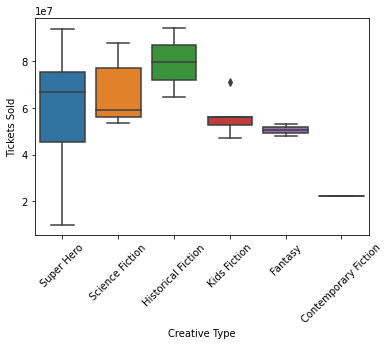

In [249]:
#association between creative type and tickets sold
sns.boxplot(x=top_movie['Creative Type'], y=top_movie['Tickets Sold'])
plt.xticks(rotation = 45)
plt.show()

From this box plot, I find that historical fiction genre has the highest mean for number of tickets sold, followed by super hero movies.